In [25]:
# 1. Import necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report,confusion_matrix

In [26]:

# 2. Load dataset

df = pd.read_csv("Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# 3. Print the no. of rows and columns

rows, cols = df.shape

print("No. of rows : ", rows)
print("No. of cols : ",cols)

No. of rows :  150
No. of cols :  6


In [4]:
# 4. Print the dataframe datatypes
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
# 5. Print the attribute names

attributes = df.columns.to_list()

print("Attributes names : ", attributes)

Attributes names :  ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [6]:
# 6. Print the top 5 rows 

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# 7. Print the bottom 5 rows

df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
# 8. Print the unique class labels

print("Unique class labels of target : ", df["Species"].unique())

Unique class labels of target :  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [9]:
# 9. Print the no of examples for each class labels

df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
# print the no of missing values in each cols

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
# 10. Drop ID column

df = df.drop(columns="Id")

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# 11. Print the summary statistics

df.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


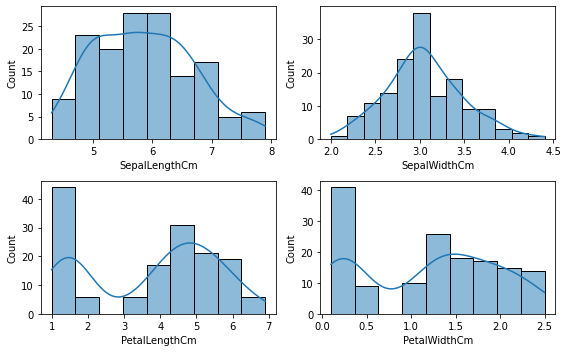

In [13]:
# 12. Plot histogram for all input features

features = [col for col in df.columns if "Species" not in col]


plt.figure(figsize=(8,5))
for i,col in enumerate(features):
    plt.subplot(2,2,i + 1)
    sns.histplot(data=df,x=col,kde=True)

plt.tight_layout()
plt.show()

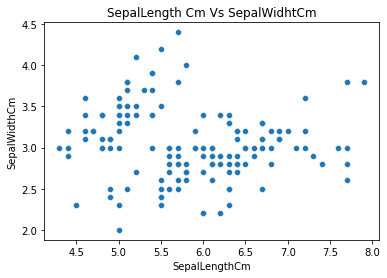

In [14]:
# 13. Create a scatterplot of "sepallengthcm" vs "sepalwidhtcm"

sns.scatterplot(data=df,x="SepalLengthCm",y="SepalWidthCm")
plt.title("SepalLength Cm Vs SepalWidhtCm")
plt.show()

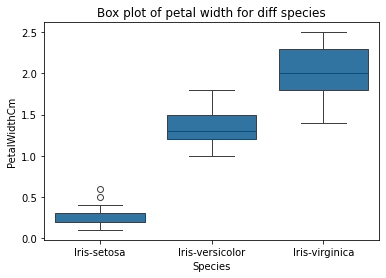

In [15]:
# 15. Boxplot of petal width for different species

sns.boxplot(data=df,y="PetalWidthCm",x="Species")
plt.title("Box plot of petal width for diff species")
plt.show()

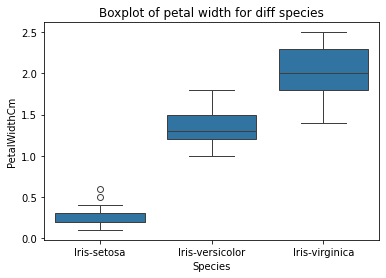

In [16]:
# 16. Boxplot of petal width for different species

sns.boxplot(data=df,x="Species",y="PetalWidthCm")
plt.title("Boxplot of petal width for diff species")
plt.show()

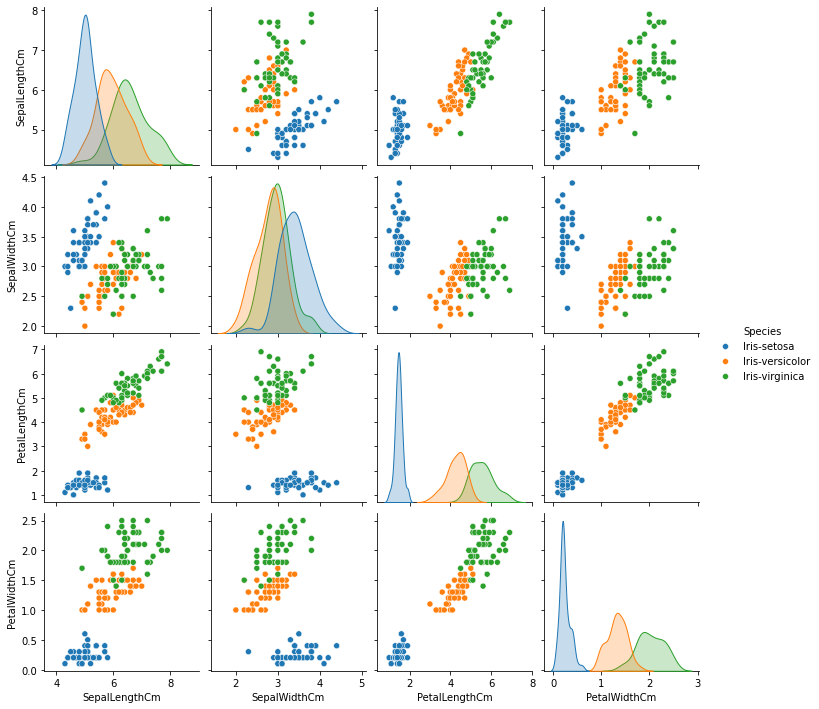

In [17]:
# 17. Pair plot of all input features colosed by species (Hint : use hue parameter)

sns.pairplot(df,hue="Species")
plt.show()

In [18]:
# 18. Print the correlation among different features

df.drop(columns="Species").corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [19]:
# 19. Prepare x and y

x = df.drop(columns="Species")
y = df["Species"]

print(x.head())
print(y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [20]:
# 20. split train and test to 70% train data, random state = 1

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=1)


In [21]:
# 21 - 24. Model building : Train SVC model using cost C = 1

model = SVC(C=1)
model.fit(x_train,y_train)

SVC(C=1)

In [22]:
# 25. Predict using the model

y_pred = model.predict(x_test)

y_pred[:5]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [23]:
# 26. Evaluate the model using confusion matrix

print("Confusion matrix : \n" , confusion_matrix(y_test,y_pred))

Confusion matrix : 
 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [24]:
#  27 - 28. Print classification report and accuracy
print("Classification report : \n", classification_report(y_test,y_pred))
print(f"Accuaracy score : {accuracy_score(y_test,y_pred):.2f}")

Classification report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuaracy score : 0.98
